# Análise exploratória

O objetivo da análise exploratória é identificar padrões nos dados e relações entre variáveis quem possam gerar insights úteis para a construção do modelo.

## Importação de pacotes e bibliotecas necessãrios para realização da análise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Leitura dos dados

In [2]:
dados = pd.read_csv('desafio_manutencao_preditiva_treino.csv')

## Consistência dos dados

Nesta primeira etapa é verificada caraceterísticas gerais dos dados. Se há valores nulos. E se todas as variáveis estão no formato experado.

O comando `info` do Pandas fornece informações gerais sobre o dataset, se há valores nulos e o tipo das variáveis.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


No dataset há 6667 registros em nenhuma das colunas foram econtrados valores ausentes, pois para todas elas o `info` retornou que há 6667 valores não nulos. Todas as variáveis também estão no formato esperado. As variáveis categoricas (di, product_id, type, failure_type) estão com o formato `object` e as numéricas (air_temperature_k, process_temperature_k, rotational_speed_rmp, torque_nm e too_wear_min) estão em formatos numéricos: `float64` ou `int64`.

Esta primeira análise descarta a necessidade de se utilizar métodos para preenchimento de falhas e conversão dos tipos das variáveis.

## Análise descritiva

O próximo passo então é olhar para métricas descritivas gerais das variáveis numéricas. O comando `describe` do Pandas fornece as principais métricas de tendência central de dados numéricos. 

Antes de processguir é necessário remover variáveis que não trazem informação útil para o entendimento do dataset. Duas candidatas a remoção são: `udi` e `product_id`. Ambas são apenas identificadores dos registros e como é observado no comando a seguir são valores únicos apenas.

In [4]:
print('Quantidade de valores únicos na variável udi:', dados.udi.nunique())
print('Quantidade de valores únicos na variável product_id:', dados.product_id.nunique())

Quantidade de valores únicos na variável udi: 6667
Quantidade de valores únicos na variável product_id: 6667


Portanto tais colunas serão removidas do dataset.

In [5]:
dados.drop(columns=['udi', 'product_id'], inplace=True)
dados.describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,299.992515,309.992620,1537.419529,40.058512,108.098095
std,1.994710,1.488101,177.182908,9.950804,63.359915
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000


As colunas `air_temperature` e `process_temperature` aparentão não ter outilers (valores muito discrepantes do demais), pois, seus mínios e máximos estão bem próximos dos limiares do primeiro e terceiro quartis. As demais colunas precisa-se verificar, pois, outilers podem comprometer o desempenho do modelo.

O comando a seguir verifica a quantidade de elementos únicos nas colunas: `type` e `failure_type`.

In [6]:
print('Quantidade de type únicos:', dados.type.nunique())
print('Valores únicos em type:', dados.type.unique())
print('Quantidade de failure_type únicos:', dados.failure_type.nunique())
print('Valores únicos em failure_type', dados.failure_type.unique())

Quantidade de type únicos: 3
Valores únicos em type: ['M' 'L' 'H']
Quantidade de failure_type únicos: 6
Valores únicos em failure_type ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


Tais resultados mostram que os valores destas colunas estão dentro do esperado, segundo o dicionário de dados. Assim, nestas colunas, todos os registros têm informações dentro do esperado.

## Descrição dos tipos de falhas

Nesta etapa na análise busca-se identificar as características principais das falhas dos equipamentos do dataset.

O tipo de equipamento mais comun do dataset são os "L" com cerca de 60% dos registros. Os tipo "M" ocupam pouco meno de 30% e os "H" com pouco menos de 10%. Isto já indica que as classes estão desbalanceadas e que serão necessários métodos para lidar com isto.

In [7]:
print('Quantidades relativas dos tipos de equipamentos')
print(dados.type.value_counts(normalize=True))
print('Quandades absolutas dos tipos de equipamentos')
print(dados.type.value_counts())

Quantidades relativas dos tipos de equipamentos
L    0.603270
M    0.298035
H    0.098695
Name: type, dtype: float64
Quandades absolutas dos tipos de equipamentos
L    4022
M    1987
H     658
Name: type, dtype: int64


A seguir é apresentado o percentual de ocorrência para os tipos de falha.

In [8]:
dados.failure_type.value_counts(normalize=True, ascending=False)*100

No Failure                  96.520174
Heat Dissipation Failure     1.124944
Power Failure                0.944953
Overstrain Failure           0.779961
Tool Wear Failure            0.449978
Random Failures              0.179991
Name: failure_type, dtype: float64

A grande maioria dos registros (96,52%) são de ocorrências sem falhas, portanto, falhas são eventos raros. As métricas de avaliação do modelo e o próprio modelo têm de ser pensadas em serem capazes de capturar eventos raros e altamente desbalanceados. 

No comando a seguir é apresentado o percentual agrupado por tipo de equipamento e tipo de falha.

In [9]:
dados.groupby(['type'])['failure_type'].value_counts(normalize=True)*100

type  failure_type            
H     No Failure                  97.416413
      Heat Dissipation Failure     1.063830
      Power Failure                0.607903
      Random Failures              0.607903
      Overstrain Failure           0.151976
      Tool Wear Failure            0.151976
L     No Failure                  95.997016
      Overstrain Failure           1.243163
      Heat Dissipation Failure     1.143710
      Power Failure                0.969667
      Tool Wear Failure            0.472402
      Random Failures              0.174043
M     No Failure                  97.282335
      Heat Dissipation Failure     1.107197
      Power Failure                1.006543
      Tool Wear Failure            0.503271
      Overstrain Failure           0.050327
      Random Failures              0.050327
Name: failure_type, dtype: float64

Os equipamentos do tipo L são os que apresentam o maior percentual de falhas (4%), mas ainda assim a diferença é pequena entre os tipos de equipamentos (1% aproximadamente).

Nos equipamentos tipo "L" a falha mais comum é "Overstrain Failure" (Excesso de força) enquanto dos outro tipos o mais comum é a falha "Hea Dissipation Failure" (Dissipação de calor) 



## Análise univariada

In [10]:
def plot_hist_box(df, x=''):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(df, x=x, ax=ax_box, color='c')
    sns.histplot(df, x=x, ax=ax_hist, color='c')
    
    ax_box.set(xlabel='')
    plt.show()

Quanto a temperatura do ar (`air_temperature`) os valores apresentam-se bem espalhados, não seguindo uma distribuição normal. Como visto anteriormente não há outliers para esta variável. A maioria dos resgistros está abaixo da média.

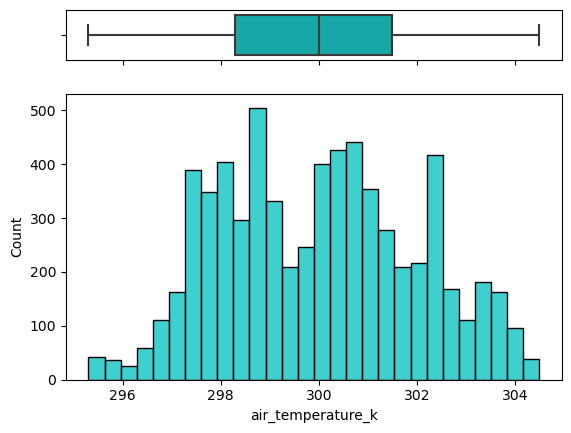

In [11]:
plot_hist_box(dados, x='air_temperature_k')

A distribuição dos registros da variável `process_temperature_k` também estão bem distribuídos, dentro do espaço amostral, porém, têm distribuição mais próxima da normal do que a série de temperatura do ar. Existem quantidades aproximadamente iguais de registros acima e abaixo da média. Também não há presença de outilers.

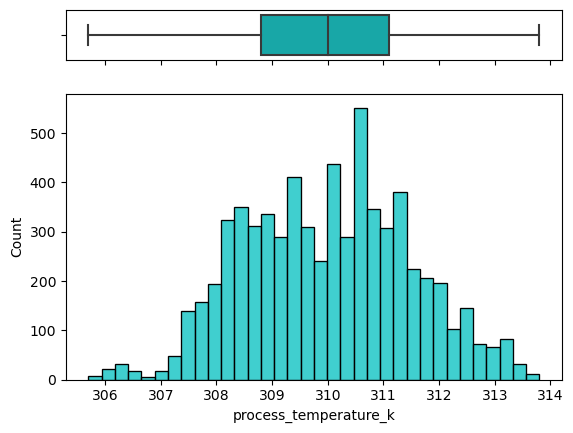

In [12]:
plot_hist_box(dados, x='process_temperature_k');

Já a distribuição de dados da variável `rotational_speed_rpm` é assimetrica a direita com vários outilers acima do terceiro quartil. A maioria dos resgistros está acima da média.

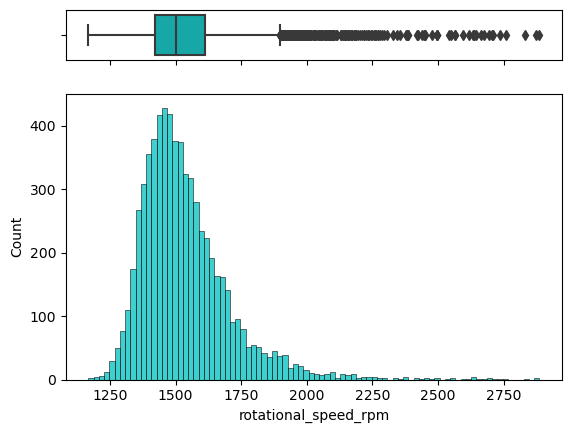

In [13]:
plot_hist_box(dados, x='rotational_speed_rpm')

A distribuição da variável `torque_nm` apresenta-se como a mais próxima de uma distribuição normal. Têm outliers tanto em ambas as caudas (extremos de mínimos e máximos). Têm concentração de valores em torno da média.

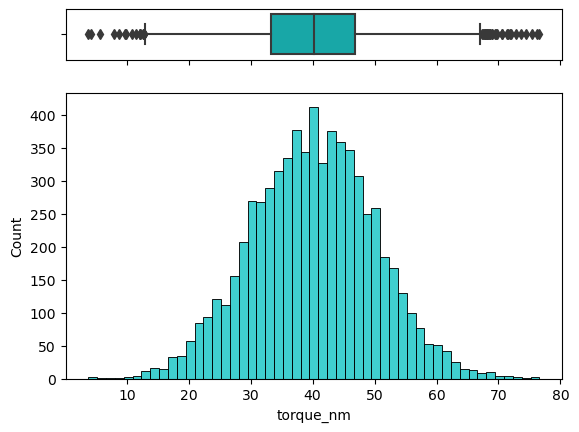

In [14]:
plot_hist_box(dados, x='torque_nm')

A variável `tool_werar_min` têm valores uniformemente (quase igual) distribuídos até o limiar de 200. Acima deste valor existe uma drástica redução no número de registro. Também não há outilers e a quantidade de registros acima e abaixo da média é aproximadamente igual.

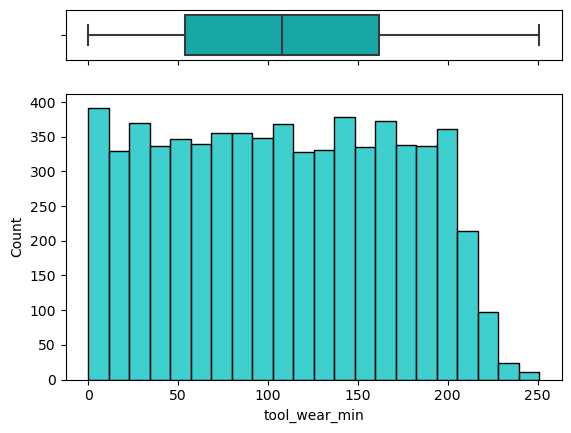

In [15]:
plot_hist_box(dados, x='tool_wear_min')

## Análises multivariada

Os histogramas a seguir mostram a relação entre diversas váriaveis e o tipo de falha. Como os casos sem falha são a grande maioria eles foram removidos desta análise pois distorceriam muito os gráficos e não seria possível identificar possíveis padrões na distribuição dos dados

O primeiro histograma mostra a relação das falhas com a teperatura do ar. Observa-se que as falhas do tipo `Oberstrain` praticamente só ocorrem com equipamentos do tipo `L`. Existem falhas ocorrem em praticamente toda a faixa de valores registrados. Porém, no caso das falhas do tipo `Heat Dissipation` as falhas ocorrem para falores de temperatura acima de 300K. Assim, a temperatura parece ser fator que influencia as falhas do tipo `Heat Dissipation`.

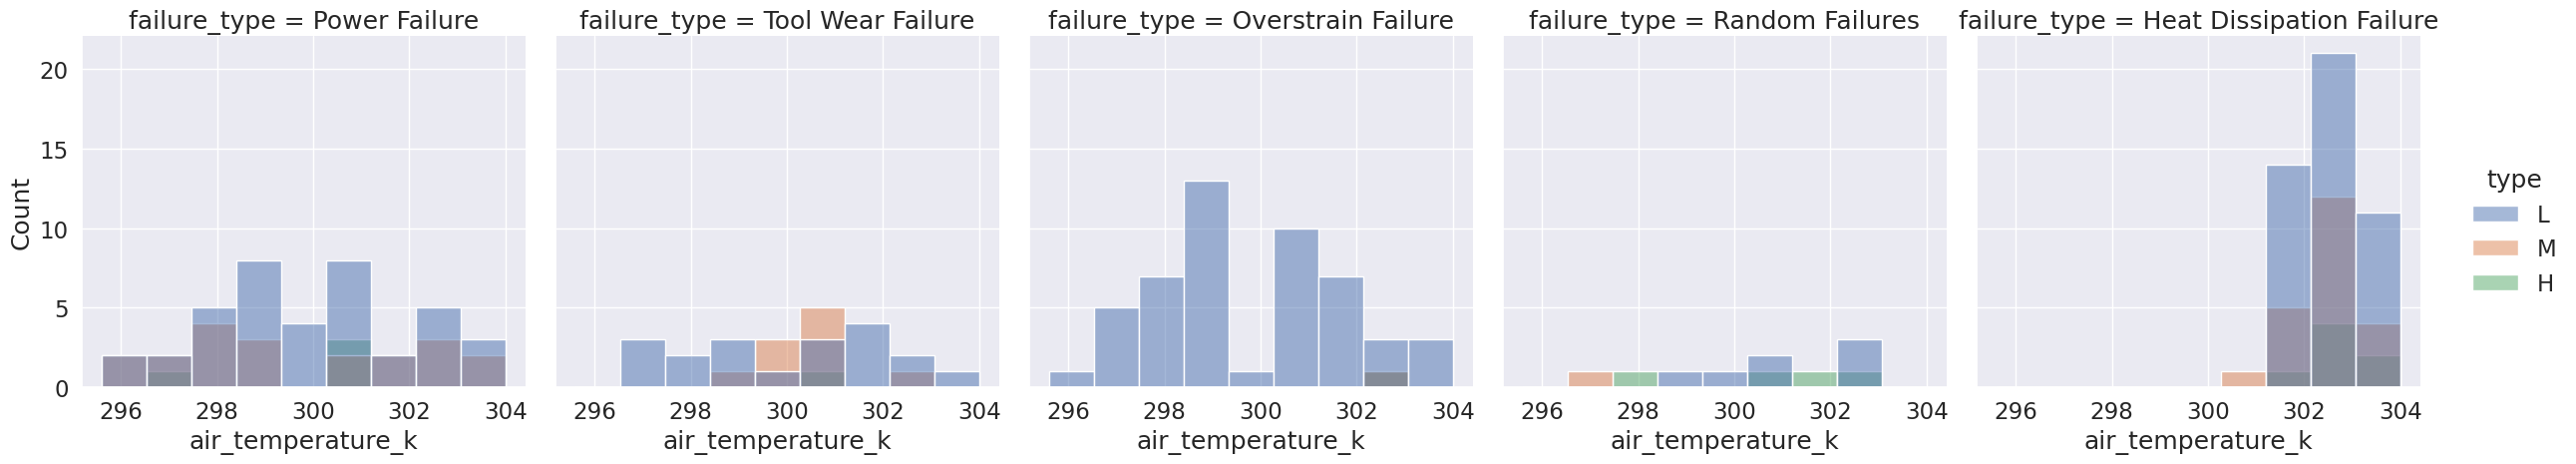

In [16]:
sns.set(font_scale=1.5)
sns.displot(dados.query("failure_type != 'No Failure'"), x='air_temperature_k', hue='type', col='failure_type');

Na próxima figura é feita a comparação com `process_temperature_k`. Os mesmos padrões observados para a `air_temperature` são observados para a `process_temperature_k`. Note-se que para as falhas do tipo `Random` são registrados os menores quantidade, mas também, são as falhas com a menor ocorrência no dataset. No caso das falhas `Heat Dissipation` as temperaturas concentram-se entre 310 K e 312 K.

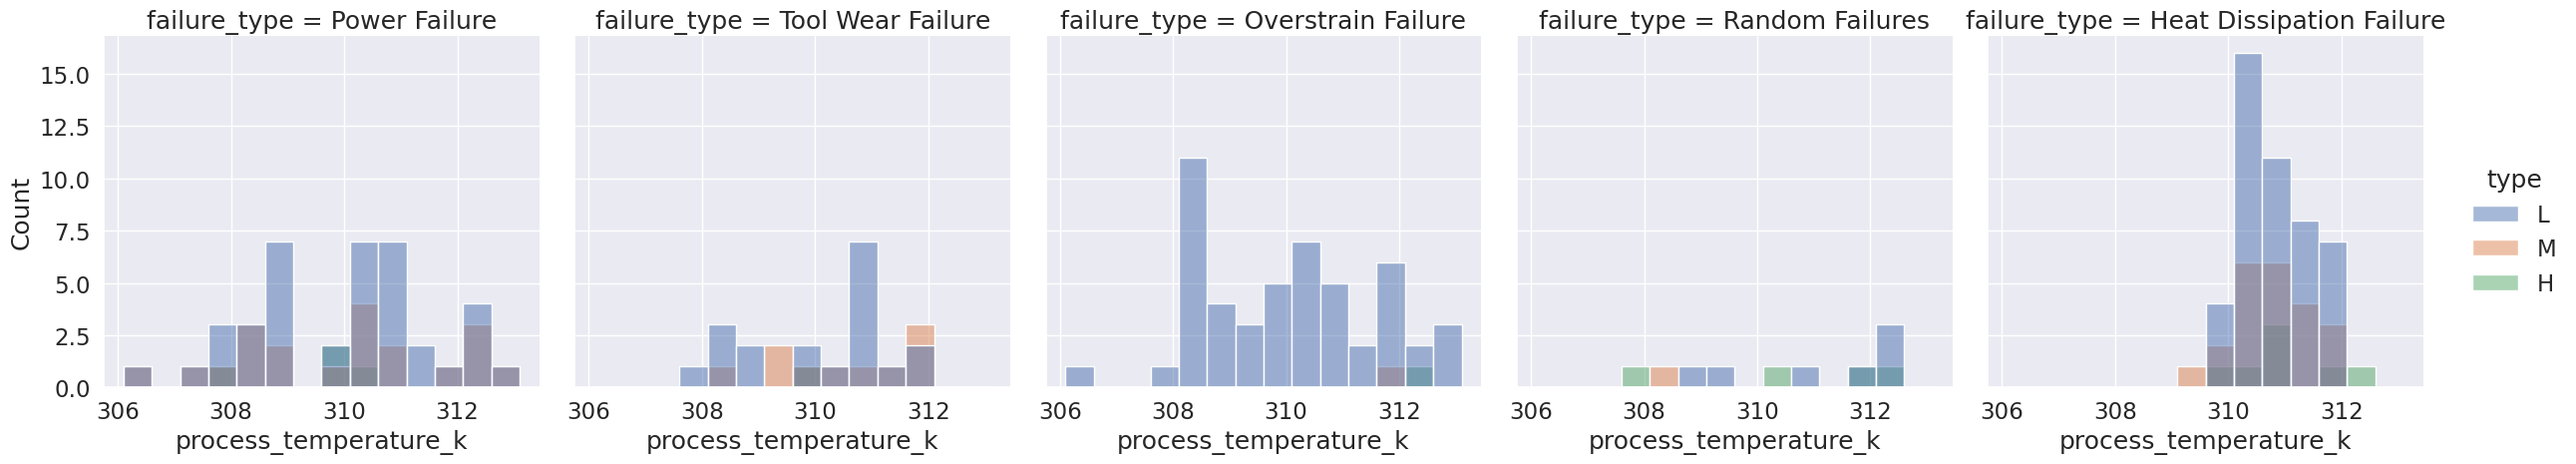

In [17]:
sns.displot(dados.query("failure_type != 'No Failure'"), x='process_temperature_k', hue='type', col='failure_type')

A seguir é feita a análise para `rotational_speed_rpm`. Para cada tipo de falha são observados padrões de distribuição dos dados diferentes:
* Para `Power Failures` as falhas ocorrem em rotações abaixos de 1500 RPM e acima de 2500 RPM;
* Para `Tool Wear Failure`ocorrem falhas entre 1000 RPM e 2400 RPM, com concentração em torno de 1500 RPM;
* Para `Overstain Failure`as falhas ocorrem em valores abaixo de 1500 RPM com predominância nos equipamentos tipo `L`
* Poucos registros são percebidos para `Random Failues`;
* Para `Heat Dissipation Failure` as falhas ocorrem em rotações abaixo de 100 RPM.

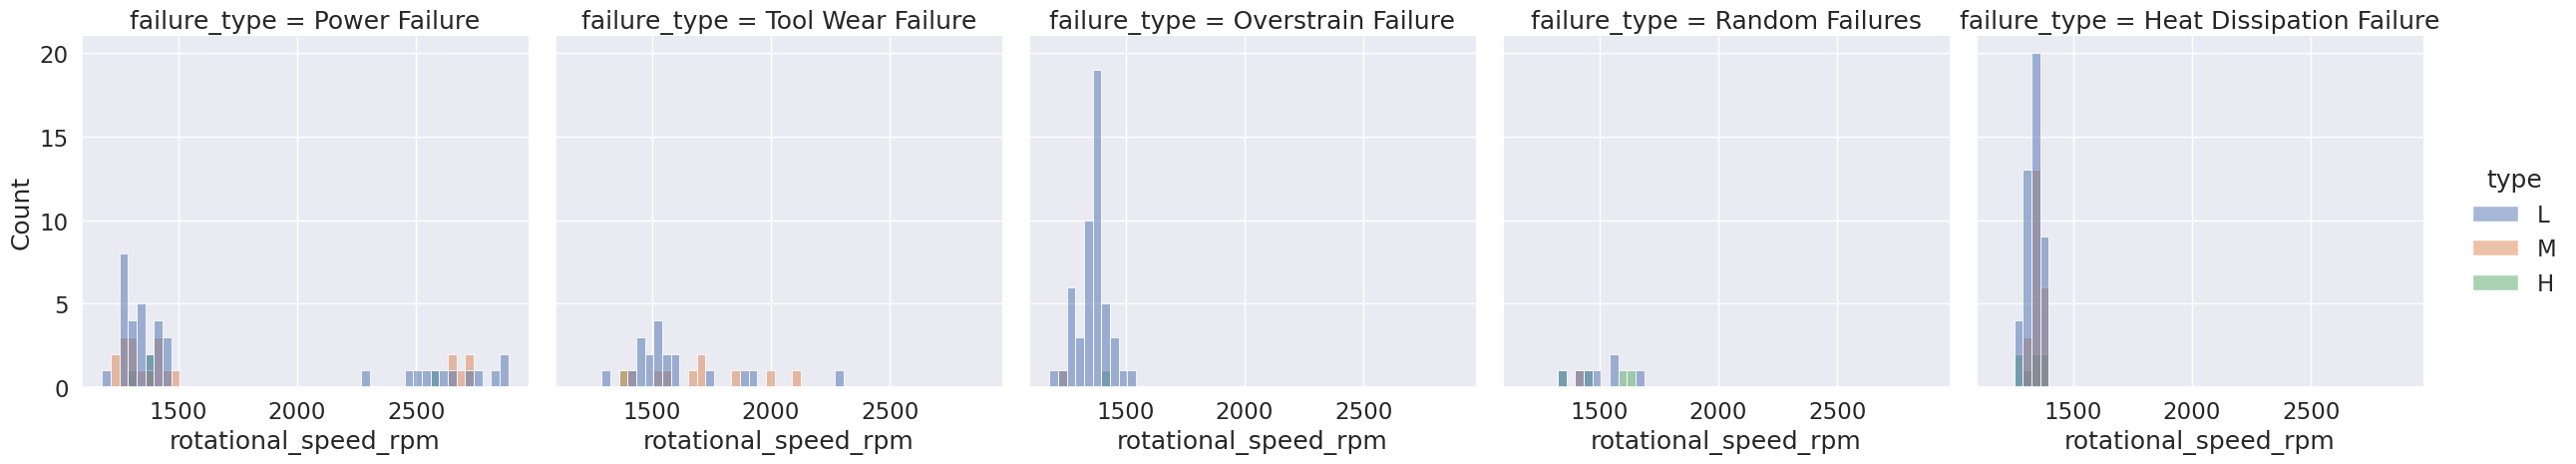

In [18]:
sns.displot(dados.query("failure_type != 'No Failure'"), x='rotational_speed_rpm', hue='type', col='failure_type')

Considerando-se a relação das falhas com o torque, mostrado na próxima figura, a maioria dos casos de falha ocorrem em situações de torque acima de 40 Nm. Apenas para a falhas `Tool Wear Failure` há maior quantidad de registros de falha para torque abaixo de 40 Nm.

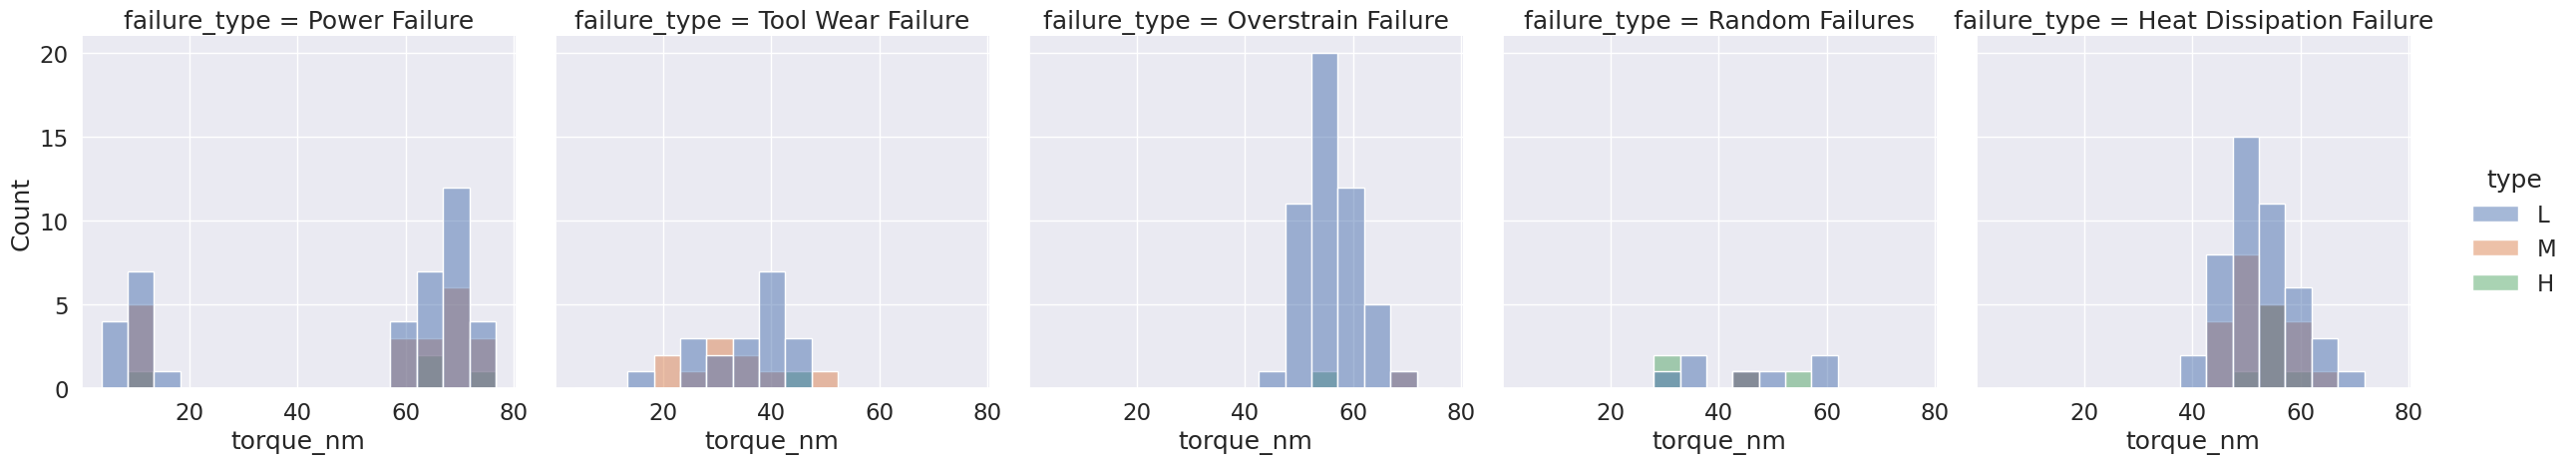

In [19]:
sns.displot(dados.query("failure_type != 'No Failure'"), x='torque_nm', hue='type', col='failure_type')

Apenas para os casos de falha dos tipos `Tool Wear` e `Oberstrain Failure` há um padrão de distribuição significativo da variável `tool_wear_min`. No caso destas duas variáveis as falhas concentram-se em faixas de valores específicos nas demais há distribuição uniforme em praticamente todos os valores de `tool_wear_min` existentes na amostra. Para a `Tool Wear Failure` os valores de `tool_wear_min` estão entre 200 e 250 e para a `Overstrain Failure` os valores estão entre 180 e 250.

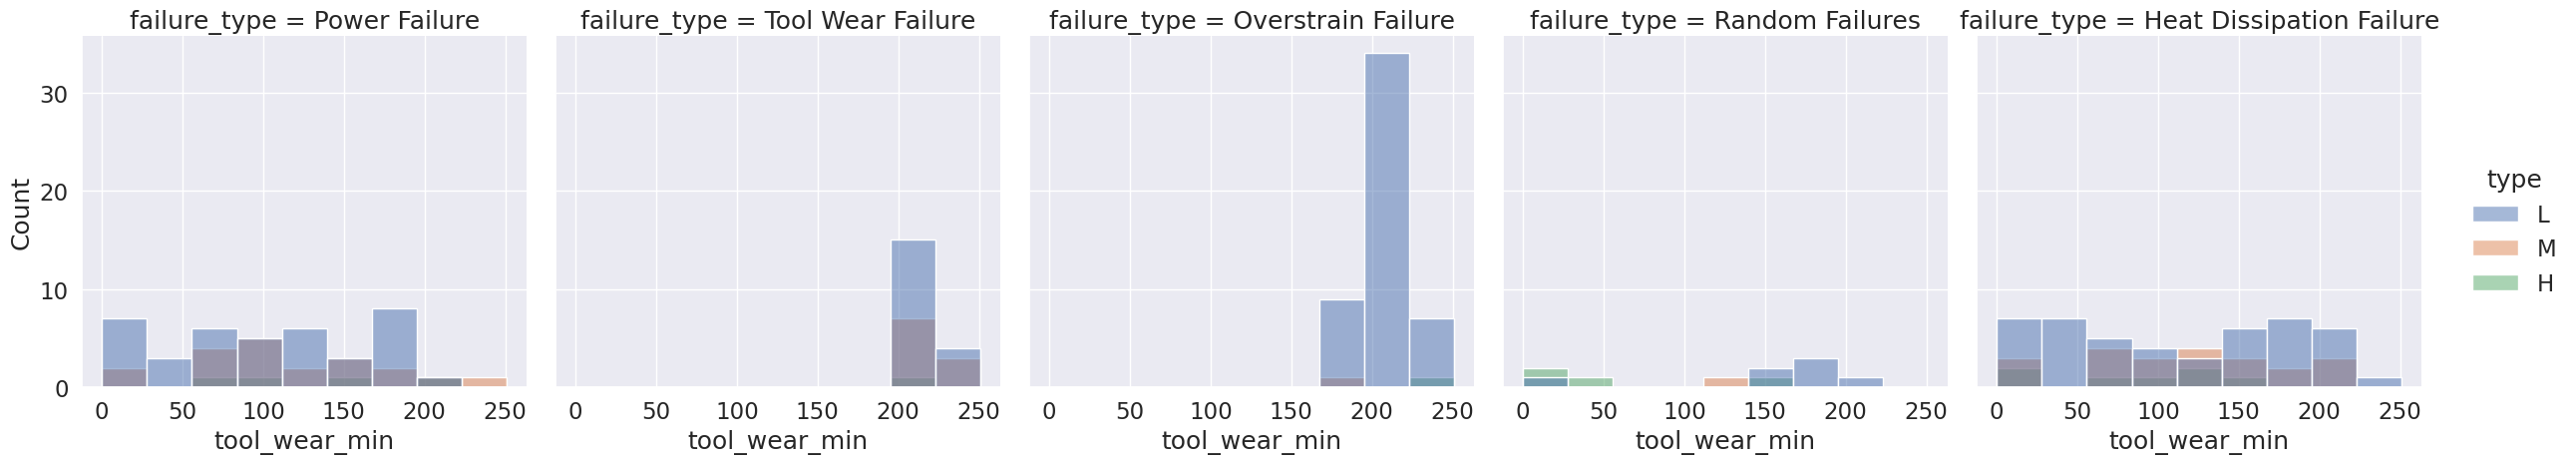

In [20]:
sns.displot(dados.query("failure_type != 'No Failure'"), x='tool_wear_min', hue='type', col='failure_type')

O correlograma a seguir mostra a correlação existente entre as variáveis numéricas do dataset. Há forte correlação positiva entre `air_temperatre_k` e `process_temperatur_k`. E há forte correlação negativa entre `torque_nm` e `rotational_speed_rpm`. Tal informação será útil para a seleção de variáveis do modelo. Pois, não é interessante manter variáveis altamente correlacionadas entre as variáveis de entrada de um modelo.

/tmp/ipykernel_5263/2851186764.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(), annot=True)


<AxesSubplot: >

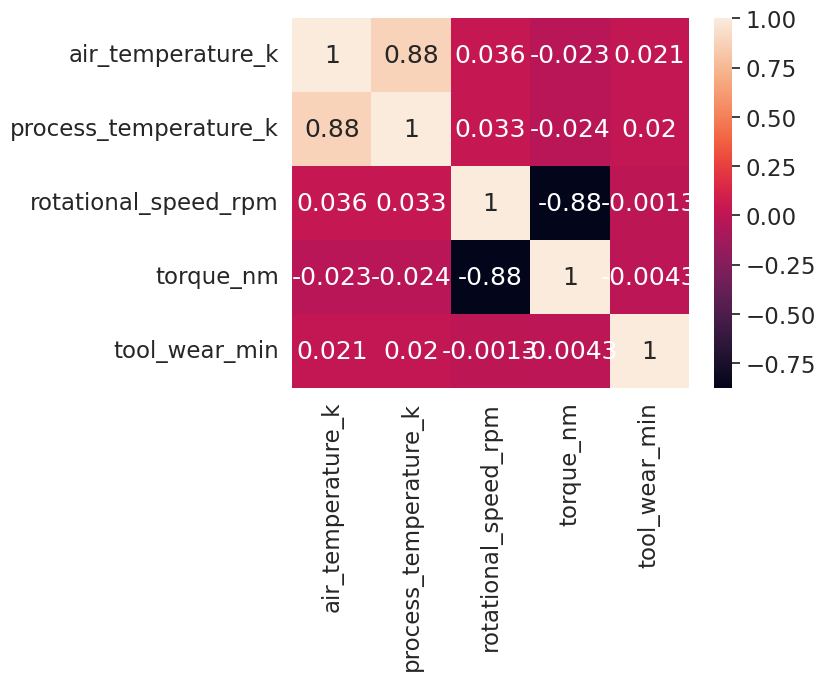

In [21]:
sns.heatmap(dados.corr(), annot=True)

## Conclusões

Esta análise exploratória mostrou, primeiramente, que as classes alvo do modelo são extremamente desbalanceadas. Isto exigirá o uso de métricas de avaliação de desempenho que levem isto em conta alguns exemplos são: f1-score e MCC Score. Como as variáveis numéricas estão em escalas de grandeza diferentes será necessário normalizar os dados para que fiquem na mesma escala de grandeza e diminuem possíveis viésis. O correlograma mostrou possíveis variáveis que possam ser removidas do modelo, a fim de dimnuir sua complexidade e custo computacional.

 Embora exisam outilers na base de dados eles não serão removidos do conjunto de treinamento do modelos. Pois é exatamente nestes outliers que ocorrem boa parte das falhas. Neste caso, remover os outliers comprometeria a capacidade do modelo em identificar e classificar corretamente certos tipos de falhas.

 Alguns tipos de falhas mostraram-se predominantes em algumas condições específicas. Como é o caso da `Overstrain Failure` que ocorre praticamente apenas com equipamentos do tipo `L`. Tais características mostram que as variáveis disponíveis têm capacidade de serem utilizadas para identificar os tipos de falhas existentes. Caso nenhum padrão fossem encontrado, e nenhum tipo de falha aparentasse ter correlação com as variáveis disponíveis, o desempenho de qualquer modelo de classificação seria seriamente comprometido.